In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_41401/2353476313.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', 10)


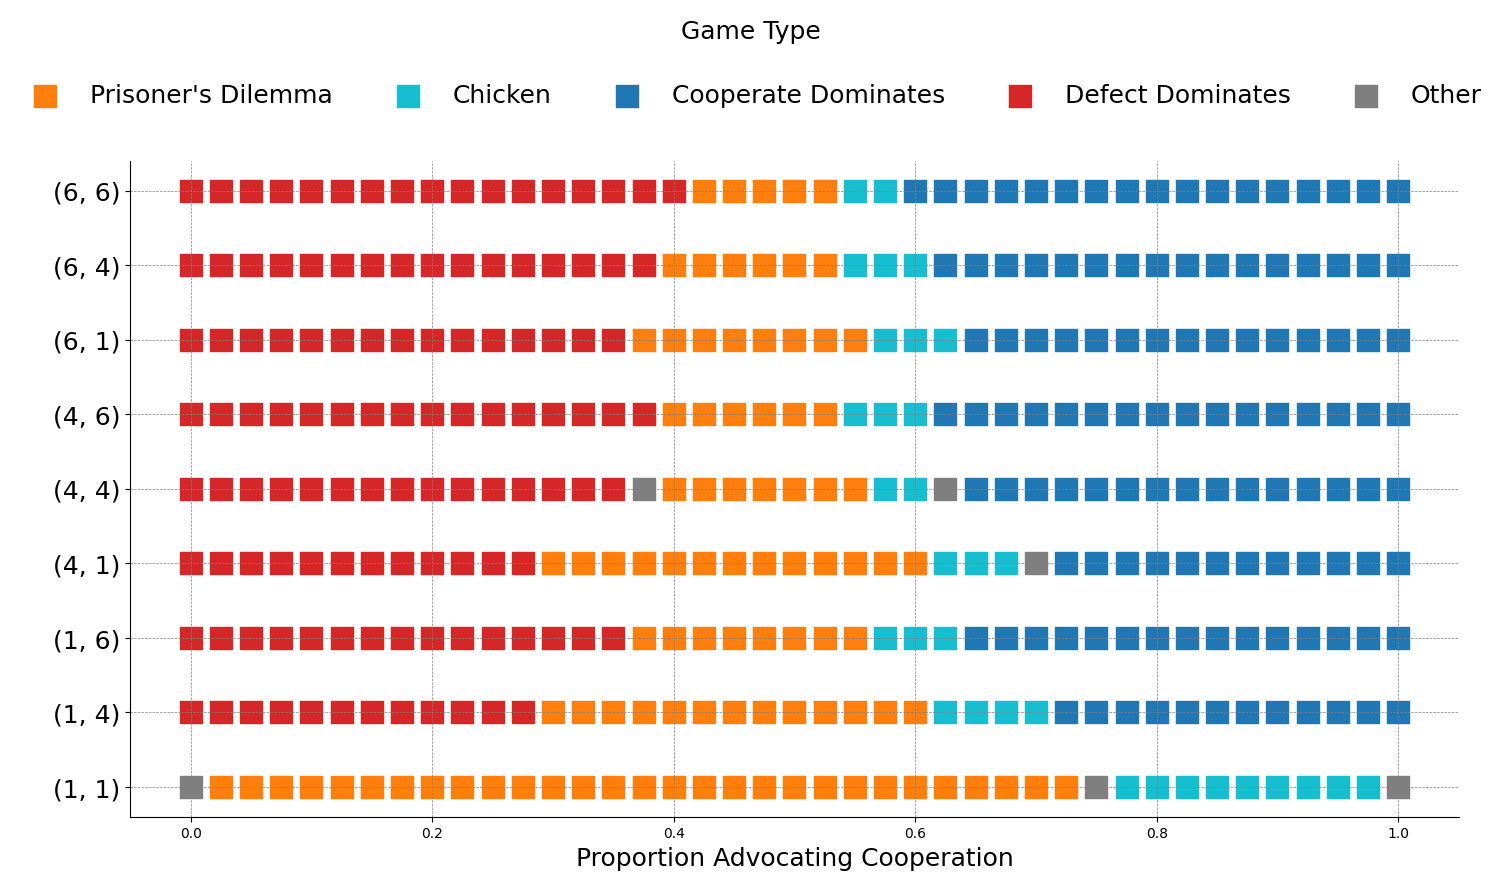

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fontsize = 18
#plt.rc('font')          # controls default text sizes

# Load the data
file_path = './simulation_explanation/game_types_all_pressures.csv'
data = pd.read_csv(file_path)

# Create a mapping from each unique pair of pressures to a unique y-coordinate
pressure_pairs = data[['max_pos_pressure', 'max_neg_pressure']].drop_duplicates()
pressure_pairs['y_coord'] = range(len(pressure_pairs))

# Merge this mapping back into the original data
data_with_y = pd.merge(data, pressure_pairs, on=['max_pos_pressure', 'max_neg_pressure'])

colors = plt.cm.get_cmap('tab10', 10)
color_mapping = {
    #"PD": colors(9),  
     "CH": colors(9),
        "PD": colors(1),  
     "Cdom": colors(0),
     "Ddom": colors(3),
     "Other": colors(7),
     }


# Map each game type to a color from the custom palette

# Mapping of abbreviations to full names for the legend
game_type_names = {
    "PD": "Prisoner's Dilemma",
    "CH": "Chicken",
    "Ddom": "Defect Dominates",
    "Cdom": "Cooperate Dominates",
    "Other": "Other"  # Assuming "Other" does not need to be renamed
}
game_types = data_with_y['game_type'].unique()

# Create the plot
plt.figure(figsize=(16, 9))
for game_type in game_types:
    game_data = data_with_y[data_with_y['game_type'] == game_type]
    plt.scatter(game_data['perc_cooperators'], game_data['y_coord'], label=game_type_names.get(game_type, game_type), alpha=1, color=color_mapping[game_type], marker='s', s=250)

plt.xlabel('Proportion Advocating Cooperation', fontsize=fontsize)
plt.ylabel(' ', fontsize=fontsize)
plt.yticks(pressure_pairs['y_coord'], [f'({pos}, {neg})' for pos, neg in zip(pressure_pairs['max_pos_pressure'], pressure_pairs['max_neg_pressure'])], fontsize=fontsize)
plt.grid(which='major', linestyle='--', linewidth='0.5', color='grey', zorder=0)

# reorder the labels
handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 2, 4, 3, 0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title='Game Type\n', bbox_to_anchor=(-0.1, 1.25), loc='upper left', ncols=5, frameon=False, fontsize=fontsize, title_fontsize=fontsize)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.savefig('game_types_all_pressures.pdf')
plt.show()


/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_41401/1164128534.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', 10)


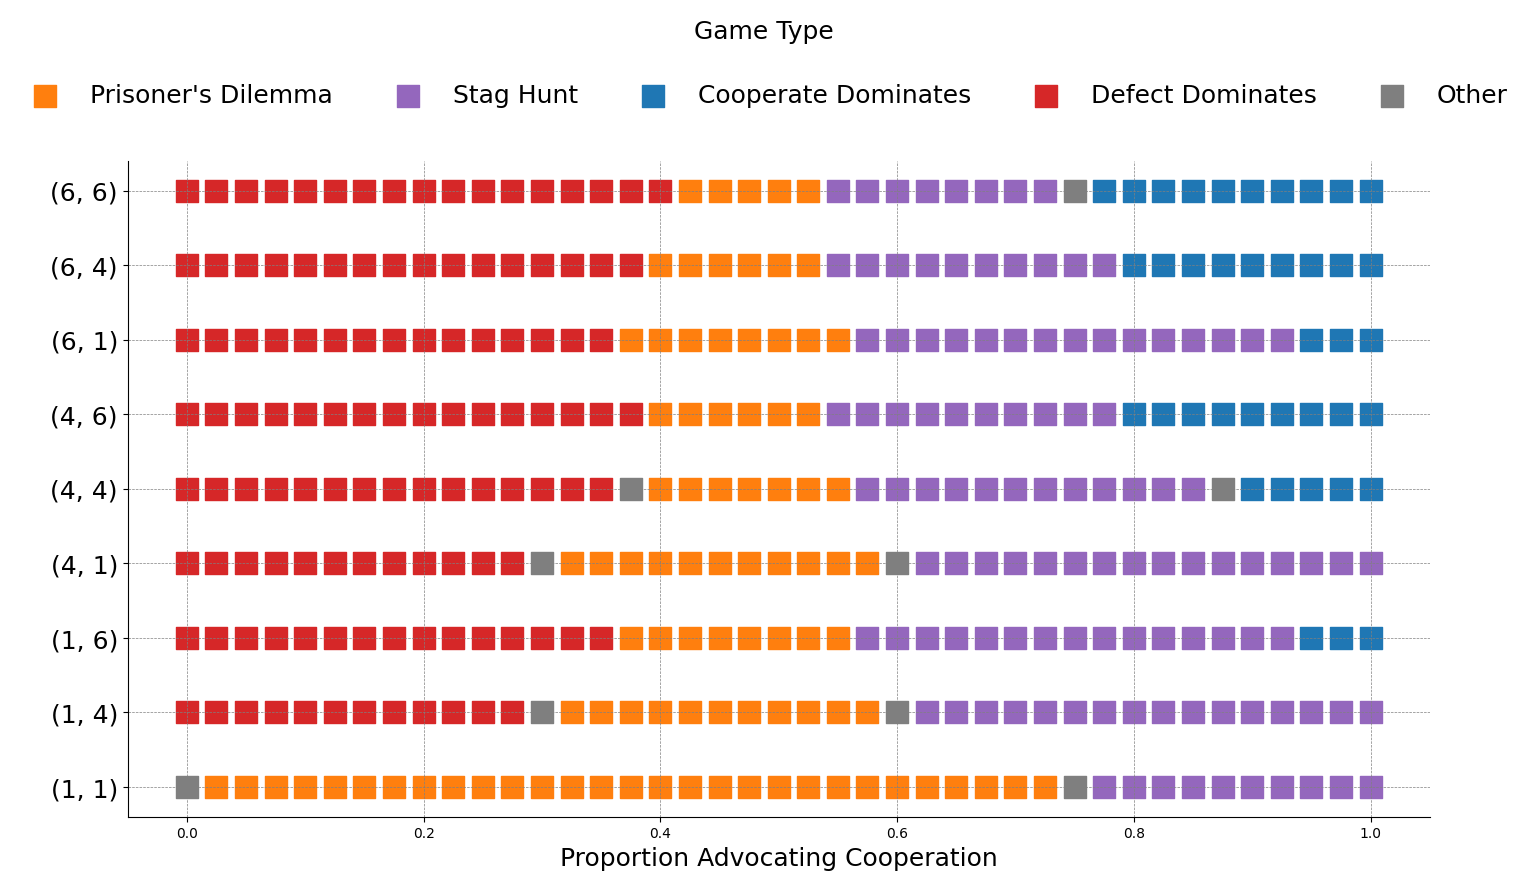

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fontsize = 18
#plt.rc('font')          # controls default text sizes

# Load the data
file_path = './simulation_explanation/game_types_all_pressures2.csv'
data = pd.read_csv(file_path)

# Create a mapping from each unique pair of pressures to a unique y-coordinate
pressure_pairs = data[['max_pos_pressure', 'max_neg_pressure']].drop_duplicates()
pressure_pairs['y_coord'] = range(len(pressure_pairs))

# Merge this mapping back into the original data
data_with_y = pd.merge(data, pressure_pairs, on=['max_pos_pressure', 'max_neg_pressure'])

colors = plt.cm.get_cmap('tab10', 10)
color_mapping = {
    #"PD": colors(9),  
     "CH": colors(9),
     "SH": colors(4),
     "PD": colors(1),  
     "Cdom": colors(0),
     "Ddom": colors(3),
     "Other": colors(7),
     }


# Map each game type to a color from the custom palette

# Mapping of abbreviations to full names for the legend
game_type_names = {
    "PD": "Prisoner's Dilemma",
    "CH": "Chicken",
    "SH": "Stag Hunt",
    "Ddom": "Defect Dominates",
    "Cdom": "Cooperate Dominates",
    "Other": "Other"  # Assuming "Other" does not need to be renamed
}
game_types = data_with_y['game_type'].unique()

# Create the plot
plt.figure(figsize=(16, 9))
for game_type in game_types:
    game_data = data_with_y[data_with_y['game_type'] == game_type]
    plt.scatter(game_data['perc_cooperators'], game_data['y_coord'], label=game_type_names.get(game_type, game_type), alpha=1, color=color_mapping[game_type], marker='s', s=250)

plt.xlabel('Proportion Advocating Cooperation', fontsize=fontsize)
plt.ylabel(' ', fontsize=fontsize)
plt.yticks(pressure_pairs['y_coord'], [f'({pos}, {neg})' for pos, neg in zip(pressure_pairs['max_pos_pressure'], pressure_pairs['max_neg_pressure'])], fontsize=fontsize)
plt.grid(which='major', linestyle='--', linewidth='0.5', color='grey', zorder=0)

# reorder the labels
handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 2, 4, 3, 0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title='Game Type\n', bbox_to_anchor=(-0.1, 1.25), loc='upper left', ncols=5, frameon=False, fontsize=fontsize, title_fontsize=fontsize)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.savefig('game_types_all_pressures2.pdf')
plt.show()


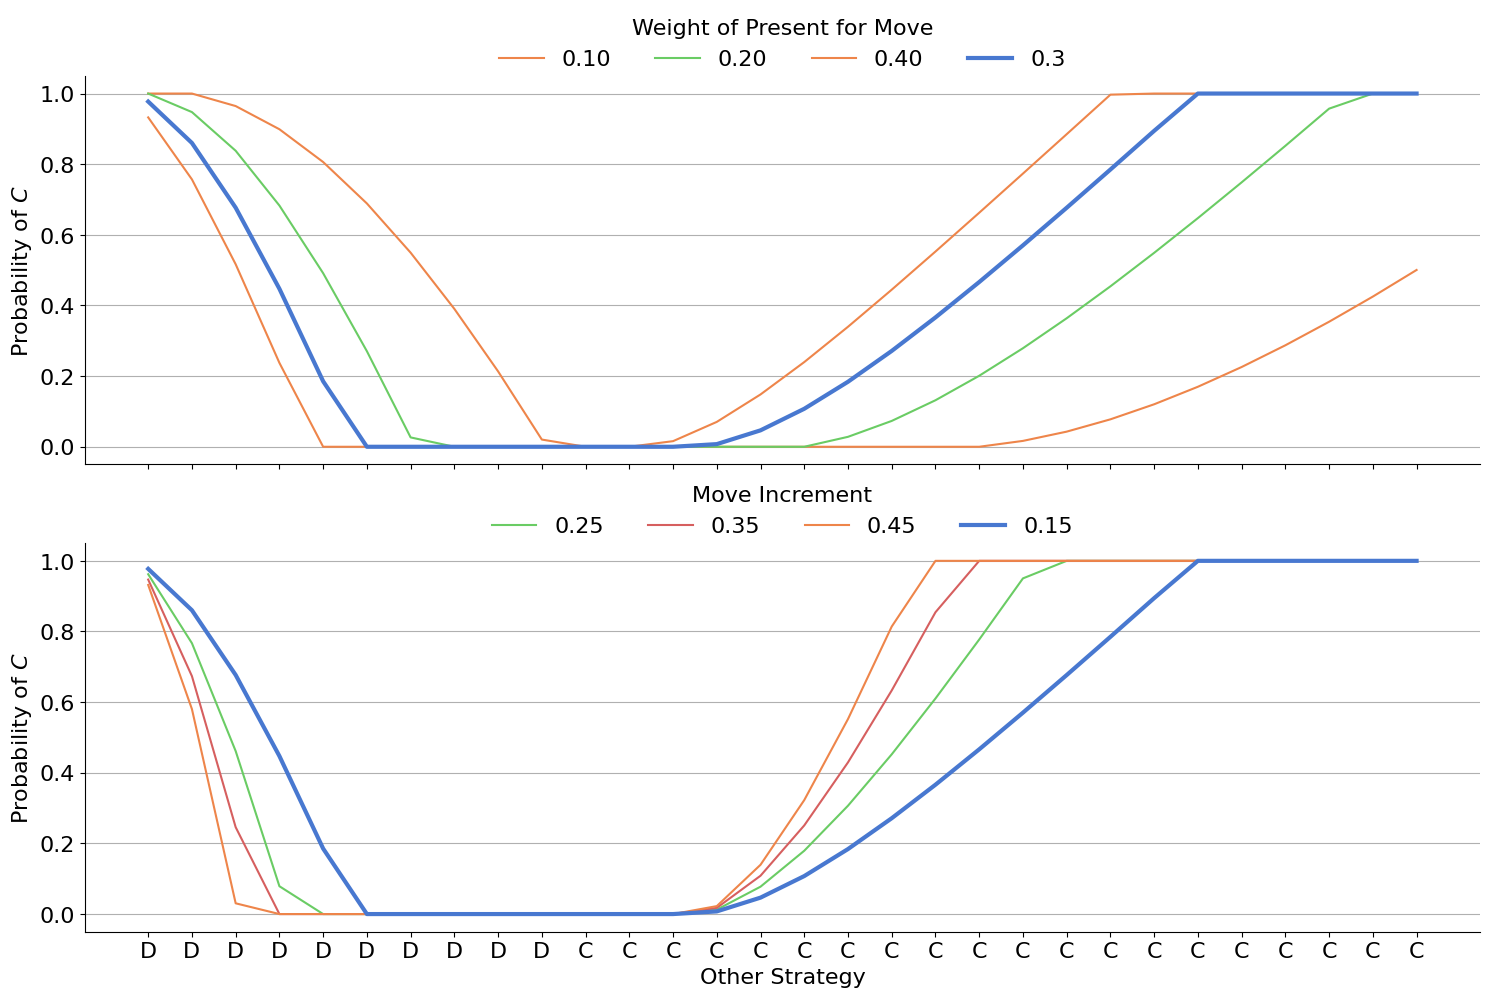

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fontsize = 16

# Load the dataframe from the uploaded file
file_path = './simulation_explanation/pr_C_vs_other_strats.csv'
df = pd.read_csv(file_path)

# Filter the data to exclude rows where weight_of_present_for_move or move_increment is 0.0
filtered_df_weight = df[(df['move_increment'] == 0.15) & (df['weight_of_present_for_move'] != 0.0)].copy()
filtered_df_increment = df[(df['weight_of_present_for_move'] == 0.3) & (df['move_increment'] != 0.0)].copy()

# Define the colors
sns_palette = sns.color_palette("muted")
muted_blue = sns_palette[0]
muted_red = sns_palette[1]
muted_green = sns_palette[2]
muted_gray = sns_palette[3]
palette = [muted_red, muted_green, muted_gray]

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Lists to store the primary lines to plot them last
primary_lines_weight = []
primary_lines_increment = []

# Plot for different weights of present for move with move_increment set to 0.15
for idx, weight in enumerate(filtered_df_weight['weight_of_present_for_move'].unique()):
    subset = filtered_df_weight[filtered_df_weight['weight_of_present_for_move'] == weight]
    for run in subset['move_increment'].unique():
        if weight == 0.3 and run == 0.15:
            linewidth = 3.0
            line_color = muted_blue
            primary_lines_weight.append((range(len(subset[subset['move_increment'] == run])), subset[subset['move_increment'] == run]['pr_C']))
        else:
            linewidth = 1.5
            line_color = palette[idx % len(palette)]
            axs[0].plot(range(len(subset[subset['move_increment'] == run])), subset[subset['move_increment'] == run]['pr_C'], linestyle='-', linewidth=linewidth, color=line_color, label=f'{weight:.2f}')

# Plot the primary line last
for x, y in primary_lines_weight:
    axs[0].plot(x, y, linestyle='-', linewidth=3.0, color=muted_blue, label='0.3')

axs[0].set_title(' ', fontsize=fontsize)
axs[0].set_ylabel('Probability of $C$', fontsize=fontsize)
axs[0].legend(title='Weight of Present for Move', fontsize=fontsize, title_fontsize=fontsize, loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=4, frameon=False)
axs[0].grid(axis='y')
axs[0].tick_params(axis='y', labelsize=fontsize)  # Set y-tick fontsize

# Plot for different move increments with weight_of_present_for_move set to 0.3
for idx, move_increment in enumerate(filtered_df_increment['move_increment'].unique()):
    subset = filtered_df_increment[filtered_df_increment['move_increment'] == move_increment]
    for run in subset['weight_of_present_for_move'].unique():
        if run == 0.3 and move_increment == 0.15:
            linewidth = 3.0
            line_color = muted_blue
            primary_lines_increment.append((range(len(subset[subset['weight_of_present_for_move'] == run])), subset[subset['weight_of_present_for_move'] == run]['pr_C']))
        else:
            linewidth = 1.5
            line_color = palette[idx % len(palette)]
            axs[1].plot(range(len(subset[subset['weight_of_present_for_move'] == run])), subset[subset['weight_of_present_for_move'] == run]['pr_C'], linewidth=linewidth, linestyle='-', color=line_color, label=f'{move_increment:.2f}')

# Plot the primary line last
for x, y in primary_lines_increment:
    axs[1].plot(x, y, linestyle='-', linewidth=3.0, color=muted_blue, label='0.15')

axs[1].set_title('', fontsize=fontsize)
axs[1].set_xlabel('Other Strategy', fontsize=fontsize)
axs[1].set_ylabel('Probability of $C$', fontsize=fontsize)

# remove the box around the legend

axs[1].legend(title='Move Increment', fontsize=fontsize, title_fontsize=fontsize, loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=4, frameon=False)
axs[1].grid(axis='y')
axs[1].tick_params(axis='y', labelsize=fontsize)  # Set y-tick fontsize

# Set custom x-ticks and rotate them 90 degrees
x_ticks = df['other_strat'].values[:30]
plt.xticks(ticks=range(len(x_ticks)), labels=x_ticks, rotation=0, fontsize=fontsize)

plt.yticks(fontsize=fontsize)
sns.despine()
plt.tight_layout()
plt.savefig('pr_C_vs_other_strats.pdf')
plt.show()
